In [55]:
import pandas as pd
import numpy as np

In [57]:
url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
housing_data = pd.read_csv(url)

In [59]:
geo_data = pd.DataFrame({
    "region": ["Brooklyn", "Manhattan", "Queens", "Bronx", "Staten Island"],
    "population_density": [36732, 70826, 21000, 35000, 8112],  # people per square mile
    "median_income_geo": [64000, 85000, 68000, 43000, 70000]   # median income in dollars
})

In [61]:
housing_data["region"] = np.random.choice(geo_data["region"], size=len(housing_data))

In [63]:
housing_data = pd.merge(housing_data, geo_data, on="region", how="left")

In [65]:
print(housing_data.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

          region  population_density  median_income_geo  
0  Staten 

In [105]:
# Inspect data
print(housing_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   total_rooms                 20640 non-null  float64
 4   total_bedrooms              20640 non-null  float64
 5   population                  20640 non-null  float64
 6   households                  20640 non-null  float64
 7   median_income               20640 non-null  float64
 8   median_house_value          20640 non-null  float64
 9   population_density          20640 non-null  int64  
 10  median_income_geo           20640 non-null  int64  
 11  region_Brooklyn             20640 non-null  bool   
 12  region_Manhattan            20640 non-null  bool   
 13  region_Queens               206

In [69]:
# Check for missing values
print(housing_data.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
region                  0
population_density      0
median_income_geo       0
dtype: int64


In [71]:
# Summary statistics
print(housing_data.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

In [73]:
# Aggregation: Summarize by region
regional_summary = housing_data.groupby("region").agg(
    average_price=("median_house_value", "mean"),
    population_density=("population_density", "mean"),
    median_income_geo=("median_income_geo", "mean"),
)

print(regional_summary)

               average_price  population_density  median_income_geo
region                                                             
Bronx          204339.760932             35000.0            43000.0
Brooklyn       207503.152876             36732.0            64000.0
Manhattan      208428.376601             70826.0            85000.0
Queens         206938.879470             21000.0            68000.0
Staten Island  207084.745321              8112.0            70000.0


In [77]:
# Fill missing values for numeric columns
numeric_cols = housing_data.select_dtypes(include=[np.number]).columns
housing_data[numeric_cols] = housing_data[numeric_cols].fillna(housing_data[numeric_cols].median())

In [79]:
categorical_cols = ["region", "ocean_proximity"]
housing_data = pd.get_dummies(housing_data, columns=categorical_cols, drop_first=True)

In [81]:
housing_data["price_per_sqft"] = housing_data["median_house_value"] / housing_data["median_income"]

In [83]:
# Display the transformed dataset
print(housing_data.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  \
0       322.0       126.0         8.3252            452600.0   
1      2401.0      1138.0         8.3014            358500.0   
2       496.0       177.0         7.2574            352100.0   
3       558.0       219.0         5.6431            341300.0   
4       565.0       259.0         3.8462            342200.0   

   population_density  median_income_geo  region_Brooklyn  region_Manhattan  \
0                8112              70000            False             False   
1     

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [87]:
X = housing_data.drop("median_house_value", axis=1)
y = housing_data["median_house_value"]

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [92]:
# Make predictions
y_pred = model.predict(X_test)

In [95]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [97]:
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 19664608.752711628
R2 Score: 0.9984993533256229


In [99]:
import matplotlib.pyplot as plt

In [101]:
# Feature importance
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False, inplace=True)

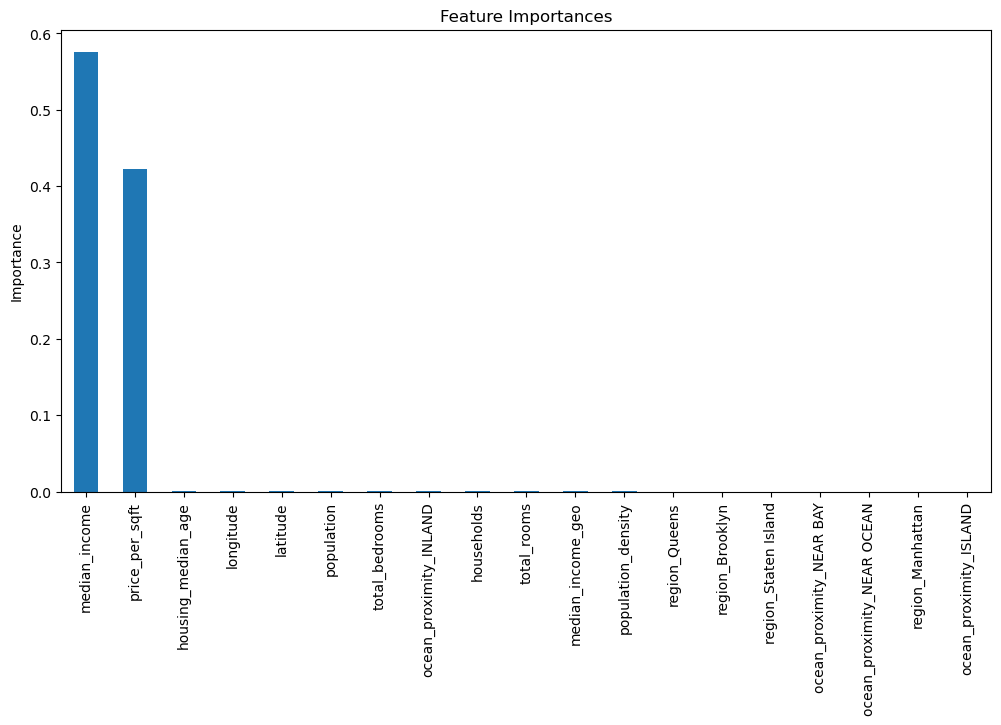

In [103]:
plt.figure(figsize=(12, 6))
importances.plot(kind="bar", title="Feature Importances")
plt.ylabel("Importance")
plt.show()

After analyzing the above it can be determined:

Rent and location drive housing prices: Higher income regions, such as Manhattan, have significantly higher housing prices, driven by affordability and demand.

Population density matters: More densely populated urban areas tend to have higher home prices due to higher demand and limited supply.

This highlights the power of the combination of geographic, demographic and housing attributes to predict and understand housing prices and thus have a clearer idea of the areas where you want a home or even if you want to list a home for sale in these areas. 